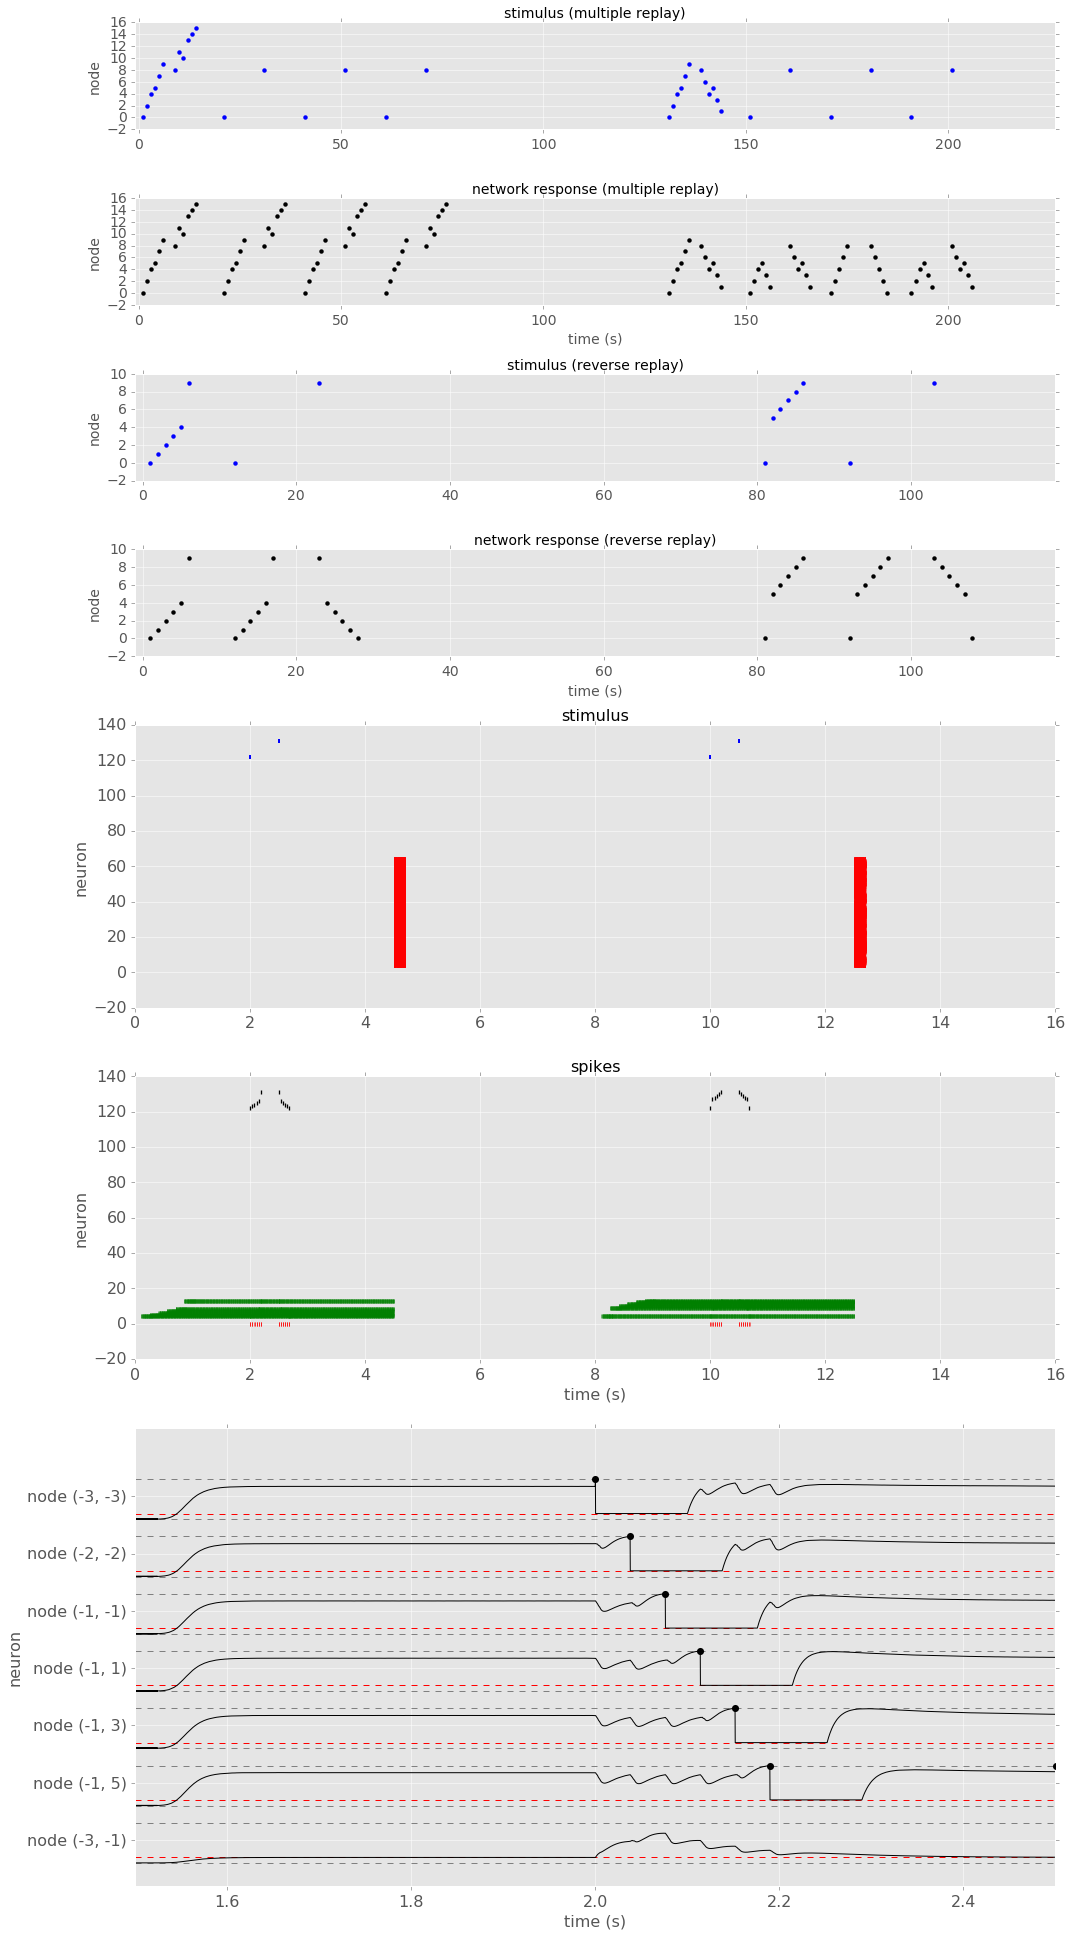

In [13]:
%matplotlib inline
from figures.final_paper import multiple_and_reverse_replay

multiple_and_reverse_replay(
    SEED_SIMPLIFIED=0, NETWORK_SIZE=6, V_TH=1.5, G_W=1, G_X=1, T_X=40, RP=2,
    # multiple replay simplified demo
    SEQ_REF=[(-3, -3), (-2, -2), (-1, -1), (-1, 1), (-2, 2), (-2, 4)],
    SEQ_NONOVERLAP=[(1, -3), (2, -2), (3, -1), (3, 1), (2, 2), (2, 4)],
    SEQ_OVERLAP=[(1, -3), (0, -2), (-1, -1), (-1, 1), (0, 2), (0, 4)],
    TRIGGER_START=20, TRIGGER_END=80,
    TRIGGER_INTERVAL=10,
    NODE_ORDER_MULTIPLE=[
        (-3, -3), (0, 4), (-2, -2), (0, 2), (-1, -1),
        (-1, 1), (0, -2), (-2, 2), (1, -3), (-2, 4),
        (3, -1), (2, -2), (1, -1), (3, 1), (2, 2), (2, 4)
    ],
    # reverse replay simplified demo
    SEQ_REVS=[
        [(-3, -3), (-2, -2), (-1, -1), (-1, 1), (-1, 3), (-1, 5)],
        [(-3, -3), (-3, -1), (-3, 1), (-3, 3), (-2, 4), (-1, 5)],
    ],
    NODE_ORDER_REVERSE=[(-3, -3), (-2, -2), (-1, -1), (-1, 1), (-1, 3), (-3, -1), (-3, 1), (-3, 3), (-2, 4), (-1, 5)],
    # lif network
    SEED_LIF=0, NETWORK_SIZE_LIF=5, DT=0.0001, OFFSET=8,
    W_PP=0.4, W_PM=0.03, W_PI=1, W_MP=1000, W_MM=.16, W_IP=50,
    TAU_P=0.02, TAU_M=0.02, TAU_I=0.01,
    V_REST_P=-0.075, V_REST_M=-0.065, V_REST_I=-0.065,
    V_TH_P=-0.045, V_TH_M=-0.045, V_TH_I=-0.045,
    V_RESET_P=-0.075, V_RESET_M=-0.065, V_RESET_I=-0.065,
    RP_P=0.1, RP_M=0.002, RP_I=0.002,
    TAUS_SYN={'ampa': 0.002, 'nmda': 0.08, 'gaba': 0.005},
    V_REVS_SYN={'ampa': 0, 'nmda': 0, 'gaba': -0.08},
    SEQ_START=0.1, SEQ_DUR=0.2, SEQ_STAGGER=0.15, SEQ_AMP=1, SEQ_FREQ=1000,  # SEQ_AMP=20, SEQ_FREQ=1000
    REPLAY_START_FOR=2, REPLAY_START_REV=2.5, REPLAY_DUR=0.001, REPLAY_AMP=5, REPLAY_FREQ=10000,
    RESET_START=4.5, RESET_DUR=0.2, RESET_AMP=50, RESET_FREQ=1000,
    BKGD_GABAS=[
        {'start': 0, 'end': 1.5, 'amp': 1000, 'freq': 10000,},
        {'start': 1.5, 'end': 4, 'amp': .001, 'freq': 10000,},
    ]);

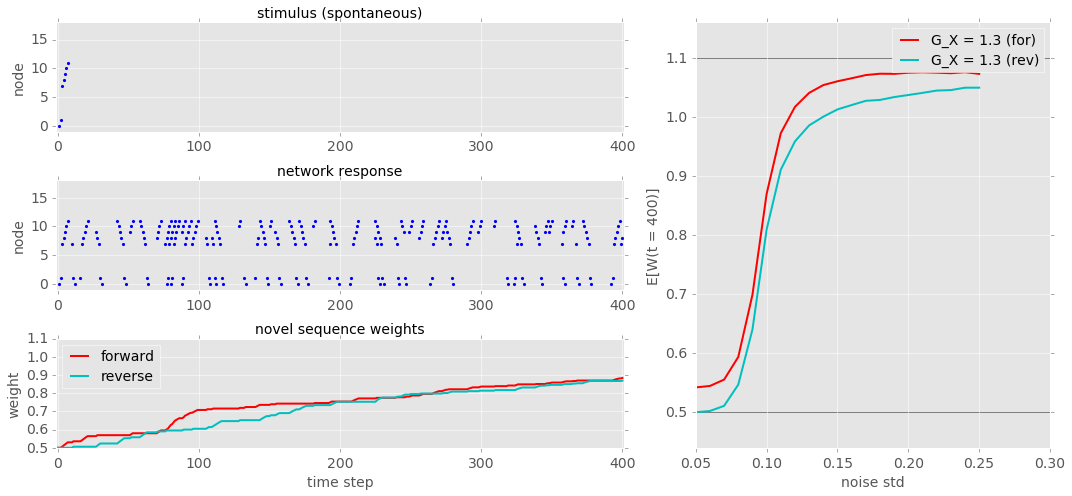

In [2]:
%matplotlib inline
import pdb
from figures.final_paper import replay_plus_stdp_spontaneous

replay_plus_stdp_spontaneous(
    NETWORK_SIZE=6, V_TH=1.5, RP=2,
    ALPHA=1, BETA_0=0, BETA_1=0.05,
    T_X=50, G_X=1.3, W_0=0.5, W_1=1.1,
    SEQS_STRONG=[
        # seq 1 forward
        [(0, -6), (-1, -5), (-2, -4), (-3, -3), (-3, -1), (-3, 1), (-3, 3)],
        # seq 1 reverse
        [(-3, 3), (-3, 1), (-3, -1), (-3, -3), (-2, -4), (-1, -5), (0, -6)],
        # seq 2 forward
        [(0, -6), (0, -4), (0, -2), (0, 0), (0, 2), (0, 4), (0, 6)],
        # seq 2 reverse
        [(0, 6), (0, 4), (0, 2), (0, 0), (0, -2), (0, -4), (0, -6)], 
        # seq 3 forward
        [(0, -6), (1, -5), (2, -4), (3, -3), (3, -1), (3, 1), (3, 3)],
        # seq 3 reverse
        [(3, 3), (3, 1), (3, -1), (3, -3), (2, -4), (1, -5), (0, -6)],
    ],
    SEQ_NOVEL=[(0, -6), (-1, -5), (-1, -3), (-1, -1), (-1, 1), (-1, 3), (-1, 5)],
    DRIVE_AMP=10, DURATION=400,
    LABEL='spontaneous', SEED=0,
    NOISE_STD=0.11, TRIGGER_INTERVAL=0, TRIGGER_SEQ=None,
    INTERRUPTION_TIME=None, INTERRUPTION_SEQ=None,
    NODE_ORDER=[
        (0, -6), (-1, -5), (-2, -4), (-3, -3), (-3, -1), (-3, 1),
        (-3, 3), (-1, -3), (-1, -1), (-1, 1), (-1, 3), (-1, 5),
    ],
    GROUP='spontaneous',
    G_XS_STATS=[1.3]);

In [3]:
pdb.pm()

> /Users/rkp/Dropbox/Repositories/nothing_but_reruns/figures/final_paper/__init__.py(703)replay_plus_stdp_spontaneous()
-> n_weights = ws_all[0].shape[1]
(Pdb) g_x
0
(Pdb) q


In [15]:
import numpy as np
import timeit

from connectivity import hexagonal_lattice
from network import LocalWtaWithAthAndStdp

w, nodes = hexagonal_lattice(6)

ntwk = LocalWtaWithAthAndStdp(
    th=1.5, w=w, g_x=1.3, t_x=50, rp=2,
    stdp_params={'w_0': 0.5, 'w_1': 1.1, 'beta_0': 0, 'beta_1': 0.07},
    wta_dist=2, wta_factor=2)

drives = 0.4 * np.random.randn(400, len(nodes))
r_0 = np.zeros((len(nodes),))
xc_0 = np.zeros((len(nodes),))

def f(): return ntwk.run(r_0, xc_0, drives)

timeit.timeit(f, number=3)

22.27116107940674

In [9]:
import numpy as np
import timeit

from connectivity import hexagonal_lattice
from network import LocalWtaWithAthAndStdp

w, nodes = hexagonal_lattice(6)

ntwk = LocalWtaWithAthAndStdp(
    th=1.5, w=w, g_x=1.3, t_x=50, rp=2,
    stdp_params={'w_0': 0.5, 'w_1': 1.1, 'beta_0': 0, 'beta_1': 0},
    wta_dist=2, wta_factor=2)

drives = 0.4 * np.random.randn(400, len(nodes))
r_0 = np.zeros((len(nodes),))
xc_0 = np.zeros((len(nodes),))

def f(): 
    np.random.seed(None)
    return ntwk.run(r_0, xc_0, drives)

timeit.timeit(f, number=30)

85.79514002799988

/Users/rkp/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


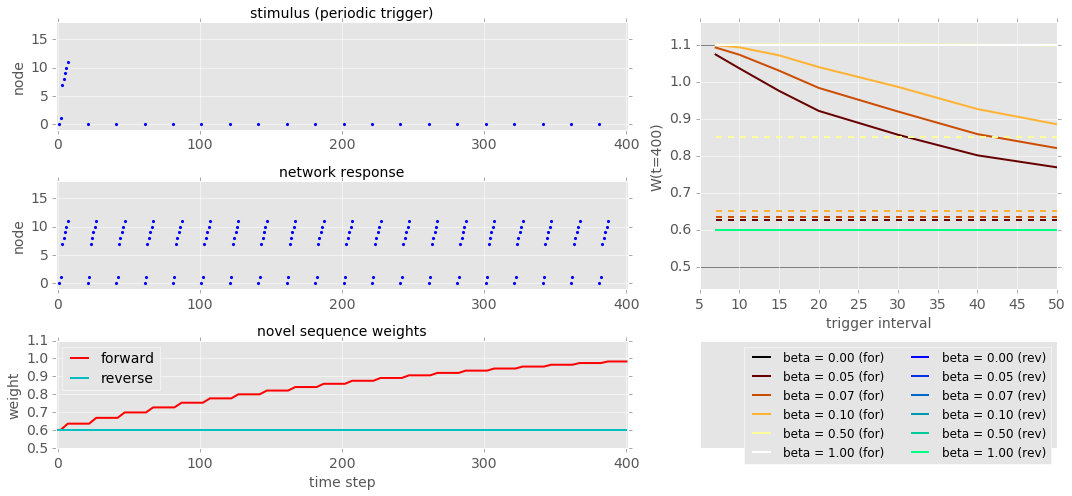

In [1]:
%matplotlib inline
import pdb
from figures.final_paper import replay_plus_stdp_periodic_stim

replay_plus_stdp_periodic_stim(
    NETWORK_SIZE=6, V_TH=1.5, RP=2, ALPHA=1, BETA_0=0, BETA_1=0.07,
    T_X=50, G_X=1.3, W_0=0.5, W_1=1.1,
    SEQS_STRONG=[
        # seq 1 forward
        [(0, -6), (-1, -5), (-2, -4), (-3, -3), (-3, -1), (-3, 1), (-3, 3)],
        # seq 1 reverse
        [(-3, 3), (-3, 1), (-3, -1), (-3, -3), (-2, -4), (-1, -5), (0, -6)],
        # seq 2 forward
        [(0, -6), (0, -4), (0, -2), (0, 0), (0, 2), (0, 4), (0, 6)],
        # seq 2 reverse
        [(0, 6), (0, 4), (0, 2), (0, 0), (0, -2), (0, -4), (0, -6)], 
        # seq 3 forward
        [(0, -6), (1, -5), (2, -4), (3, -3), (3, -1), (3, 1), (3, 3)],
        # seq 3 reverse
        [(3, 3), (3, 1), (3, -1), (3, -3), (2, -4), (1, -5), (0, -6)],
    ],
    SEQ_NOVEL=[(0, -6), (-1, -5), (-1, -3), (-1, -1), (-1, 1), (-1, 3), (-1, 5)],
    DRIVE_AMP=10, DURATION=400,
    LABEL='periodic trigger',
    SEED=0,
    NOISE_STD=0,
    TRIGGER_INTERVAL=20,
    TRIGGER_SEQ=[(0, -6)],
    INTERRUPTION_TIME=None,
    INTERRUPTION_SEQ=[(0, -6), (-1, -5), (-2, -4), (-3, -3), (-3, -1), (-3, 1), (-3, 3)],
    NODE_ORDER=[
        (0, -6), (-1, -5), (-2, -4), (-3, -3), (-3, -1), (-3, 1),
        (-3, 3), (-1, -3), (-1, -1), (-1, 1), (-1, 3), (-1, 5),
    ],
    GROUP='periodic_stim',
    G_XS_STATS=[1.3, 0]);

/Users/rkp/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


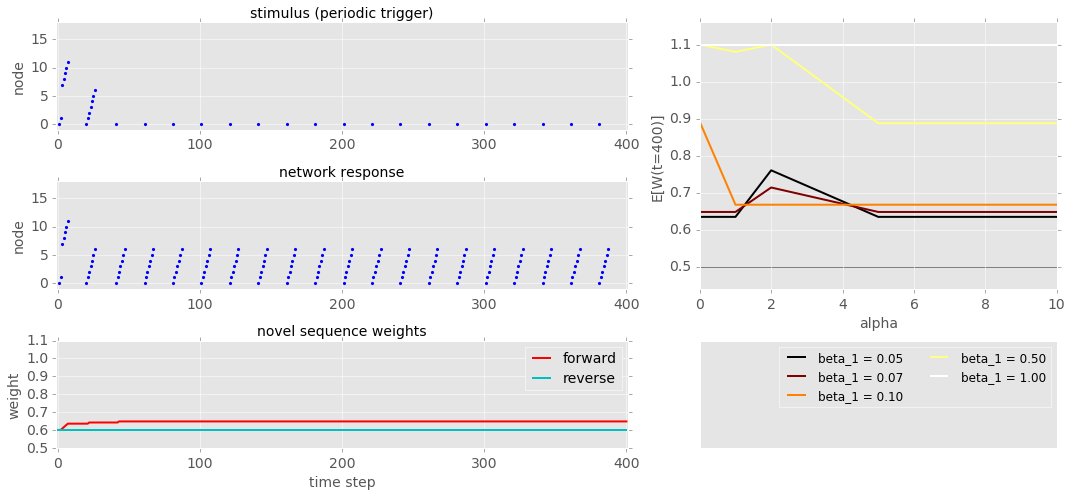

In [1]:
%matplotlib inline
import pdb
from figures.final_paper import replay_plus_stdp_interrupted

replay_plus_stdp_interrupted(
    NETWORK_SIZE=6, V_TH=1.5, RP=2, ALPHA=1, BETA_0=0, BETA_1=0.07,
    T_X=50, G_X_EX=1.3, W_0=0.5, W_1=1.1,
    SEQS_STRONG=[
        # seq 1 forward
        [(0, -6), (-1, -5), (-2, -4), (-3, -3), (-3, -1), (-3, 1), (-3, 3)],
        # seq 1 reverse
        [(-3, 3), (-3, 1), (-3, -1), (-3, -3), (-2, -4), (-1, -5), (0, -6)],
        # seq 2 forward
        [(0, -6), (0, -4), (0, -2), (0, 0), (0, 2), (0, 4), (0, 6)],
        # seq 2 reverse
        [(0, 6), (0, 4), (0, 2), (0, 0), (0, -2), (0, -4), (0, -6)], 
        # seq 3 forward
        [(0, -6), (1, -5), (2, -4), (3, -3), (3, -1), (3, 1), (3, 3)],
        # seq 3 reverse
        [(3, 3), (3, 1), (3, -1), (3, -3), (2, -4), (1, -5), (0, -6)],
    ],
    SEQ_NOVEL=[(0, -6), (-1, -5), (-1, -3), (-1, -1), (-1, 1), (-1, 3), (-1, 5)],
    DRIVE_AMP=10, DURATION=400,
    LABEL='periodic trigger',
    SEED=4,
    NOISE_STD=0,
    TRIGGER_INTERVAL=20,
    TRIGGER_SEQ=[(0, -6)],
    INTERRUPTION_TIME=20,
    INTERRUPTION_SEQ=[(0, -6), (-1, -5), (-2, -4), (-3, -3), (-3, -1), (-3, 1), (-3, 3)],
    NODE_ORDER=[
        (0, -6), (-1, -5), (-2, -4), (-3, -3), (-3, -1), (-3, 1),
        (-3, 3), (-1, -3), (-1, -1), (-1, 1), (-1, 3), (-1, 5),
    ],
    GROUP='interrupted',
    G_X=1.3);

In [1]:
from figures.final_paper import record_replay_plus_stdp

record_replay_plus_stdp(
    SEED=0, GROUP='test',
    LOG_FILE='logs/replay_plus_stdp_low_alpha.log',
    NETWORK_SIZE=6, V_TH=1.5, RP=2,  # network size, threshold, refractory period
    SEQS_STRONG=[
        # seq 1 forward
        [(0, -6), (-1, -5), (-2, -4), (-3, -3), (-3, -1), (-3, 1), (-3, 3)],
        # seq 1 reverse
        [(-3, 3), (-3, 1), (-3, -1), (-3, -3), (-2, -4), (-1, -5), (0, -6)],
        # seq 2 forward
        [(0, -6), (0, -4), (0, -2), (0, 0), (0, 2), (0, 4), (0, 6)],
        # seq 2 reverse
        [(0, 6), (0, 4), (0, 2), (0, 0), (0, -2), (0, -4), (0, -6)], 
        # seq 3 forward
        [(0, -6), (1, -5), (2, -4), (3, -3), (3, -1), (3, 1), (3, 3)],
        # seq 3 reverse
        [(3, 3), (3, 1), (3, -1), (3, -3), (2, -4), (1, -5), (0, -6)],
    ],
    SEQ_NOVEL=[(0, -6), (-1, -5), (-1, -3), (-1, -1), (-1, 1), (-1, 3), (-1, 5)],
    DRIVE_AMP=10,
    ALPHAS=[1],
    BETA_0S=[0],
    BETA_1S=[0, 0.05, 0.1],
    T_XS=[50],
    G_XS=[1.3],
    W_0S=[0.5],
    W_1S=[1.1],
    NOISE_STDS=[0],
    TRIGGER_INTERVALS=[10],
    ZIP=['ALPHAS', 'BETA_0S', 'T_XS', 'G_XS', 'W_0S', 'W_1S', 'NOISE_STDS', 'TRIGGER_INTERVALS'],
    CPRODUCT=['BETA_1S'],
    TRIGGER_SEQ=[(0, -6)],
    INTERRUPTION_SEQ=[(0, -6), (-1, -5), (-2, -4), (-3, -3), (-3, -1), (-3, 1), (-3, 3)],
    INTERRUPTION_TIME=None,
    N_TRIALS=2,
    W_MEASUREMENT_TIME=200)

In [31]:
from itertools import product as cproduct

def zip_cproduct(z, c, order, **kwargs):
    zipped = zip(*[kwargs[k] for k in z])
    temp_0 = list(cproduct(*([zipped] + list([kwargs[k] for k in c]))))
    temp_1 = [ii[0] + ii[1:] for ii in temp_0]
    
    current_order = z + c
    temp_2 = [
        tuple([ii[current_order.index(jj)] for jj in order])
        for ii in temp_1
    ]
    
    return temp_2

x = ['x1', 'x2', 'x3']
y = ['y1', 'y2', 'y3']

z0 = ['z00', 'z01']
z1 = ['z10', 'z11']

kwargs = {'x': x, 'y': y, 'z0': z0, 'z1': z1}
z = ['x', 'y']
c = ['z0', 'z1']

zip_cproduct(z=z, c=c, order=['y', 'z1', 'x', 'z0'], **kwargs)

[('y1', 'z10', 'x1', 'z00'),
 ('y1', 'z11', 'x1', 'z00'),
 ('y1', 'z10', 'x1', 'z01'),
 ('y1', 'z11', 'x1', 'z01'),
 ('y2', 'z10', 'x2', 'z00'),
 ('y2', 'z11', 'x2', 'z00'),
 ('y2', 'z10', 'x2', 'z01'),
 ('y2', 'z11', 'x2', 'z01'),
 ('y3', 'z10', 'x3', 'z00'),
 ('y3', 'z11', 'x3', 'z00'),
 ('y3', 'z10', 'x3', 'z01'),
 ('y3', 'z11', 'x3', 'z01')]

In [4]:
zip(x, y)

[('x1', 'y1'), ('x2', 'y2'), ('x3', 'y3')]

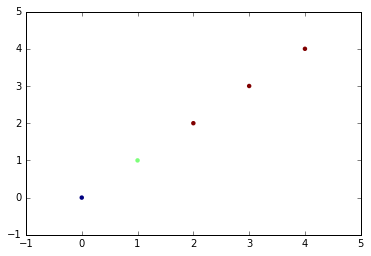

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.array([0, 1, 2, 3, 4])

fig, ax = plt.subplots(1, 1)
ax.scatter(x, x, c=x, vmin=0, vmax=2, lw=0)

In [4]:
from figures.final_paper import record_extension_by_spontaneous_replay

record_extension_by_spontaneous_replay(
    SEED=0, GROUP_NAME='test', LOG_FILE='logs/test_extension_by_spontaneous_replay.log',
    NETWORK_SIZE=6, V_TH=1.5, RP=2, T_X=50,
    NODE_SEQ=[(-1, -3), (-1, -1), (-1, 1), (0, 2), (1, 3), (2, 2)],
    DRIVE_AMP=2, PROBE_TIME=200,
    ALPHA=0, G_XS=[1.2, 1.4], G_WS=[0.8, 0.6],
    NOISE_STDS=[0.05, 0.15],
    N_TRIALS=200, LOW_PROB_THRESHOLD=0.03, LOW_PROB_MIN_TRIALS=30)

[0 1 2 3 4 5] [33 34 35 46 57 66]


### TO DO

1. Edit local WTA network rule so that it goes by input, not activation.
2. Set up parameter sweep for g_x, g_w, and noise level.

In [3]:
import numpy as np

x = np.array([
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0]
    ])

x.nonzero()

(array([0, 2, 4]), array([4, 1, 0]))

/Users/rkp/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


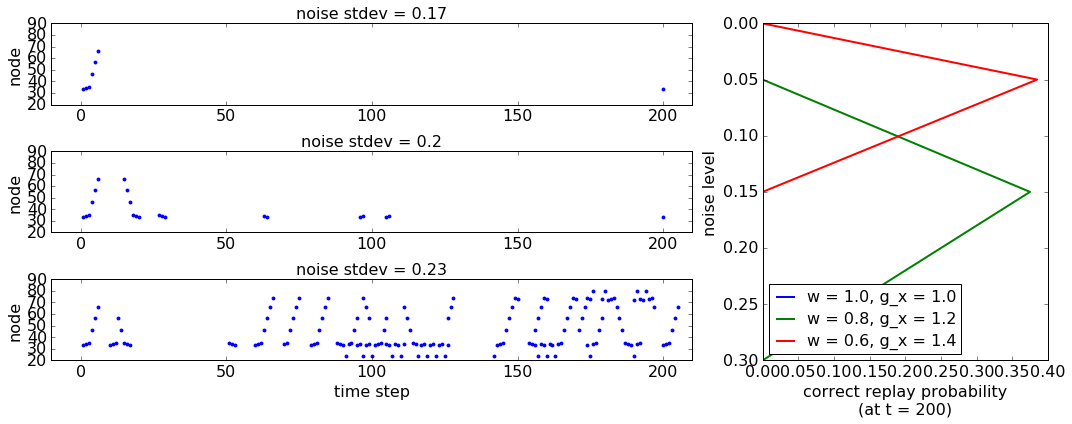

In [5]:
%matplotlib inline
import numpy as np
from figures.final_paper import extension_by_spontaneous_replay as f

f(
    SEEDS_EXAMPLE=(0, 7, 0), NOISES_EXAMPLE=(0.17, 0.2, 0.23),
    SEED_STATS=0, NOISES_STATS=[0, 0.05, 0.15, 0.3], N_TRIALS=200,
    D=6, W=1, TH=1.5, G_X=1, T_X=60, RP=2,
    WS_STATS=[1., 0.8, 0.6], G_XS_STATS=[1., 1.2, 1.4],
    NODE_SEQ=[(-1, -3), (-1, -1), (-1, 1), (0, 2), (1, 3), (2, 2)],
    REPLAY_TRIGGER=200,
    DRIVE_AMP=2);

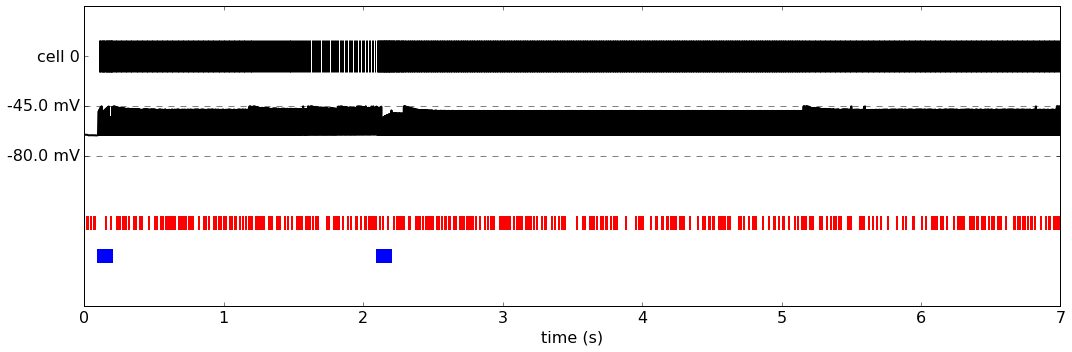

In [63]:
%matplotlib inline
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np

from network import LIFExponentialSynapsesModel
from plot import set_fontsize

W_MM = .125

ws = {'ampa': np.zeros((1, 1)), 'nmda': W_MM * np.ones((1, 1)), 'gaba': np.zeros((1, 1))}
v_rests = np.array([-0.065])
taus_m = np.array([0.020])
v_ths = np.array([-0.045])
v_resets = np.array([-0.065])
refrac_pers = np.array([0.002])

taus_syn = {'ampa': 0.002, 'nmda': 0.08, 'gaba': 0.005}
v_revs_syn = {'ampa': 0, 'nmda': 0, 'gaba': -0.08}

ntwk = LIFExponentialSynapsesModel(
    v_rests=v_rests, taus_m=taus_m, v_ths=v_ths, v_resets=v_resets, refrac_pers=refrac_pers,
    taus_syn=taus_syn, v_revs_syn=v_revs_syn, ws=ws)

dt = 0.001
dur = 7
n_steps = int(dur/dt)
drives = {key: np.zeros((n_steps, 1)) for key in taus_syn.keys()}

drives['ampa'][int(.1/dt):int(.2/dt), 0] = 1
drives['ampa'][int(2.1/dt):int(2.2/dt), 0] = 1

drives['gaba'][:, 0] = .1 * (np.random.rand(n_steps) < .06).astype(float)

initial_conditions = {
    'voltages': v_rests.copy(),
    'conductances': {syn: np.array([0.]) for syn in taus_syn.keys()},
    'refrac_ctrs': np.zeros((1,)),
}

measurements = ntwk.run(initial_conditions, drives, dt, record=['voltages', 'spikes'])

ts = np.arange(len(measurements['voltages']) - 1) * dt

fig, ax = plt.subplots(1, 1, figsize=(15, 5), tight_layout=True)

y_ticks = []
y_tick_labels = []

offset = 0

# plot drives
m = 1 / (ws.values()[0].shape[0])
b = 0

colors = {'ampa': 'b', 'nmda': 'g', 'gaba': 'r'}
for ctr, syn in enumerate(['ampa', 'nmda', 'gaba']):
    
    drive_times, drive_idxs = drives[syn][:-1].nonzero()
    
    ax.scatter(
        drive_times * dt, m * drive_idxs + b + offset + ctr / 3,
        s=200, marker='|', color=colors[syn], lw=2)
    

# plot voltages
offset += 2
ax.axhline(0 + offset, color='gray', ls='--')
ax.axhline(1 + offset, color='gray', ls='--')

y_ticks.extend([0 + offset, 1 + offset])
y_tick_labels.extend(
    ['{} mV'.format(v_revs_syn['gaba'] * 1000), '{} mV'.format(v_ths[0] * 1000)])

m = 1 / (v_ths[0] - v_revs_syn['gaba'])
b = -m * v_revs_syn['gaba']

ax.plot(ts, m * measurements['voltages'][:-1] + b + offset, color='k', lw=2)

# plot spikes
offset += 2
spike_times, spike_idxs = measurements['spikes'][:-1].nonzero()

m = 1 / (ws.values()[0].shape[0])
b = 0

y_ticks.append(offset)
y_tick_labels.append('cell 0')

ax.scatter(spike_times * dt, m * spike_idxs + b + offset, marker='|', s=1000, c='k', lw=1)

ax.set_xlim(ts[0], ts[-1])
ax.set_xlabel('time (s)')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_tick_labels)

set_fontsize(ax, 16)

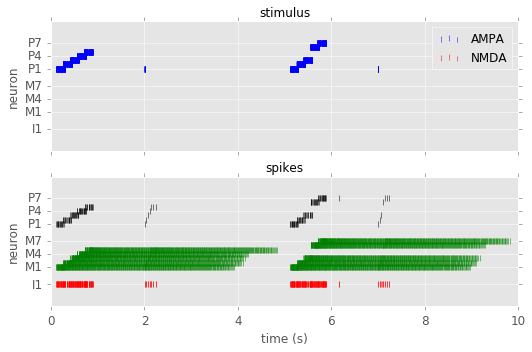

In [23]:
%matplotlib inline
from figures.cosyne import toy_network_lif

toy_network_lif(
    SEED=0, DT=0.0001, OFFSET=5,
    W_PP=.7, W_PM=0.03, W_PI=20, W_MP=25, W_MM=.14, W_IP=20,
    TAU_P=0.02, TAU_M=0.02, TAU_I=0.01,
    V_REST_P=-0.065, V_REST_M=-0.065, V_REST_I=-0.065,
    V_TH_P=-0.045, V_TH_M=-0.045, V_TH_I=-0.045,
    V_RESET_P=-0.065, V_RESET_M=-0.065, V_RESET_I=-0.065,
    RP_P=0.002, RP_M=0.002, RP_I=0.002,
    TAUS_SYN={'ampa': 0.002, 'nmda': 0.08, 'gaba': 0.005},
    V_REVS_SYN={'ampa': 0, 'nmda': 0, 'gaba': -0.08},
    SEQ_START=0.1, SEQ_DUR=0.2, SEQ_STAGGER=0.15, SEQ_AMP=10, SEQ_FREQ=500,
    REPLAY_START=2, REPLAY_DUR=0.01, REPLAY_AMP=1, REPLAY_FREQ=1000,
    RESET_START=3, RESET_DUR=0.2, RESET_AMP=0, RESET_FREQ=1000,
    BKGD_GABA_AMP=2, BKGD_GABA_FREQ=1000,
    BKGD_GABA_AMP_MEM=0, BKGD_GABA_FREQ_MEM=60);

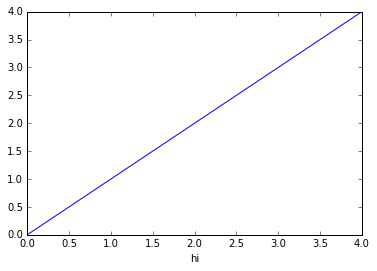

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt;
import numpy as np

fig, ax = plt.subplots(1, 1)

ax.plot(range(5))
ax.set_xlabel('hi')